# Optimización: Tarea 5
## Oscar Esaú Peralta Rosales

In [0]:
import time

from typing import Callable, Dict, Tuple
from collections import namedtuple

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [0]:
NBINS = 8
radial_size = 120
img_name = 'person2.bmp'

In [0]:
def read_histogram(file_name):
    values = []
    with open(file_name) as fp:
        for line in fp:
            values += [int(x) for x in line.split()]
    shape = tuple(values[:3])
    values = np.array(values[3:], dtype=np.float128)
    return values.reshape(shape)


h_0 = read_histogram('H_0.txt')
h_1 = read_histogram('H_1.txt')

In [7]:
h_0

array([[[2358.,  976.,    0.],
        [  25., 1314.,   51.],
        [   0.,    0.,    0.]],

       [[ 426.,   31.,    0.],
        [  17.,  905., 3557.],
        [   0.,   15., 2660.]],

       [[   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    5.,  902.]]], dtype=float128)

In [8]:
h_1

array([[[1.2247e+04, 3.1000e+01, 0.0000e+00],
        [1.4950e+03, 5.5840e+03, 0.0000e+00],
        [0.0000e+00, 1.7600e+02, 6.0000e+00]],

       [[2.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.0000e+01, 4.6700e+02, 3.3000e+01],
        [0.0000e+00, 1.3600e+02, 7.0000e+01]],

       [[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 8.0000e+00, 0.0000e+00],
        [0.0000e+00, 2.0000e+00, 1.0000e+00]]], dtype=float128)

In [0]:
img = cv2.imread(img_name)

(450, 600, 3)


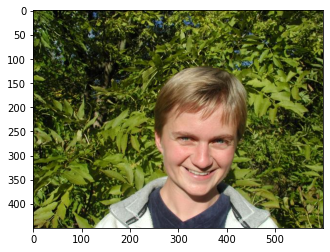

In [10]:
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Funciones a optimizar

In [0]:
def _get_hc_c(h):
    b1, b2, b3 = h.shape
    hc_c = [
          (h[i][j][k], np.array([i,j,k]))
          for i in range(b1)
          for j in range(b2)
          for k in range(b3)
    ]
    return hc_c


hc_c0 = _get_hc_c(h_0)
hc_c1 = _get_hc_c(h_1)


def f(x1, x2, hc_c, sigma=0.1):
    if len(x1.shape) == 1:
        alpha = x1
        mu = x2
    else:
        alpha = x2
        mu = x1

    ans = 0.0
    for h_c, c in hc_c:
        sum2 = np.sum(alpha * np.exp(-(np.linalg.norm(c - mu, axis=1)**2) / (2*sigma**2)))
        ans += (h_c - sum2)**2
    return ans


def f_grad_alpha(alpha, mu, hc_c, sigma=0.1):
    grad = np.zeros(alpha.shape)

    for k in range(grad.shape[0]):
        sum1 = 0.0
        for h_c, c in hc_c:
            sum2 = np.sum(alpha * np.exp(-(np.linalg.norm(c - mu, axis=1)**2) / (2*sigma**2)))
            e_k = np.exp(-(np.linalg.norm(c - mu[k])**2) / (2*sigma**2))
            sum1 +=  (h_c - sum2) * e_k
        grad[k] = -2 * sum1

    return grad


def f_grad_mu(mu, alpha, hc_c, sigma=0.1):
    grad = np.zeros(mu.shape)    

    for k in range(grad.shape[0]):
        sum1 = 0.0
        for h_c, c in hc_c:
            sum2 = np.sum(alpha * np.exp(-(np.linalg.norm(c - mu, axis=1)**2) / (2*sigma**2)))
            e_k = np.exp(-(np.linalg.norm(c - mu[k])**2) / (2*sigma**2))
            sum1 += (h_c - sum2) * (alpha[k] * e_k * (c - mu[k]))
        grad[k] = -2 * sum1 / sigma**2
    
    return grad
    # return grad.reshape((grad.shape[0] * grad.shape[1]))


In [12]:
n = 30

alpha = np.ones(n)
mu = np.ones((n, 3))

f(alpha, mu, hc_c0, sigma=0.1), f(alpha, mu, hc_c1, sigma=0.1)

(29732616.0, 183653490.0)

In [13]:
f_grad_alpha(alpha, mu, hc_c0, sigma=0.1), f_grad_alpha(alpha, mu, hc_c1, sigma=0.1)

(array([-1750., -1750., -1750., -1750., -1750., -1750., -1750., -1750.,
        -1750., -1750., -1750., -1750., -1750., -1750., -1750., -1750.,
        -1750., -1750., -1750., -1750., -1750., -1750., -1750., -1750.,
        -1750., -1750., -1750., -1750., -1750., -1750.]),
 array([-874., -874., -874., -874., -874., -874., -874., -874., -874.,
        -874., -874., -874., -874., -874., -874., -874., -874., -874.,
        -874., -874., -874., -874., -874., -874., -874., -874., -874.,
        -874., -874., -874.]))

In [14]:
f_grad_mu(mu, alpha, hc_c0, sigma=0.1), f_grad_mu(mu, alpha, hc_c1, sigma=0.1)

(array([[ 5.06875460e-17,  6.17199951e-19, -1.36555489e-16],
        [ 5.06875460e-17,  6.17199951e-19, -1.36555489e-16],
        [ 5.06875460e-17,  6.17199951e-19, -1.36555489e-16],
        [ 5.06875460e-17,  6.17199951e-19, -1.36555489e-16],
        [ 5.06875460e-17,  6.17199951e-19, -1.36555489e-16],
        [ 5.06875460e-17,  6.17199951e-19, -1.36555489e-16],
        [ 5.06875460e-17,  6.17199951e-19, -1.36555489e-16],
        [ 5.06875460e-17,  6.17199951e-19, -1.36555489e-16],
        [ 5.06875460e-17,  6.17199951e-19, -1.36555489e-16],
        [ 5.06875460e-17,  6.17199951e-19, -1.36555489e-16],
        [ 5.06875460e-17,  6.17199951e-19, -1.36555489e-16],
        [ 5.06875460e-17,  6.17199951e-19, -1.36555489e-16],
        [ 5.06875460e-17,  6.17199951e-19, -1.36555489e-16],
        [ 5.06875460e-17,  6.17199951e-19, -1.36555489e-16],
        [ 5.06875460e-17,  6.17199951e-19, -1.36555489e-16],
        [ 5.06875460e-17,  6.17199951e-19, -1.36555489e-16],
        [ 5.06875460e-17

## Barzilai Borwein

In [0]:
stop_x = lambda x_k, x_k_next: np.linalg.norm(x_k_next - x_k) / max(np.linalg.norm(x_k), 1.0)
stop_f = lambda f_x_k, f_x_k_next: np.abs(f_x_k_next - f_x_k) / max(np.abs(f_x_k), 1.0)
stop_g = lambda grad_k: np.linalg.norm(grad_k)


def barzilai_borwein(X: np.array,
                     f: Callable[[np.array], np.array],
                     g: Callable[[np.array], np.array],
                     tol_x: float=1e-12,
                     tol_g: float=1e-12,
                     tol_f: float=1e-12,
                     mxitr: int=100,
                     **kwargs):
    Result = namedtuple('Result', 'x_log f_log g_norm_log')

    x_log = []
    f_log = []
    g_norm_log = []

    x_k_prev = None; 
    x_k = X;
    x_log.append(x_k)

    g_k_prev = None
    g_k = g(x_k, **kwargs.get('g_kwargs', {}))
    g_norm_log.append(np.linalg.norm(g_k))

    f_k = f(x_k, **kwargs.get('f_kwargs', {}))
    f_log.append(f_k)

    k = 0
    alpha_k = kwargs.get('alpha', 1e-2)
    
    while np.linalg.norm(g_k) > tol_g and k < mxitr:
        if k != 0:
            s_k1 = x_k - x_k_prev
            y_k1 = g_k - g_k_prev
            #print(len(y_k1.shape))
            if len(y_k1.shape) != 1:
                s_k1 = s_k1.reshape((s_k1.shape[0] * s_k1.shape[1]))
                y_k1 = y_k1.reshape((y_k1.shape[0] * y_k1.shape[1]))
            alpha_k = np.dot(s_k1, y_k1) / np.dot(y_k1, y_k1)
        
        x_k_prev = x_k.copy()
        x_k = x_k_prev - alpha_k * g_k
        x_log.append(x_k)

        g_k_prev = g_k
        g_k = g(x_k, **kwargs.get('g_kwargs', {}))
        g_norm_log.append(np.linalg.norm(g_k))

        f_k = f(x_k, **kwargs.get('f_kwargs', {}))
        f_log.append(f_k)
        # if k%100 == 0:
        print(k, f_k, g_norm_log[-1])

        # Stop criteria
        if stop_x(x_log[-2], x_log[-1]) <= tol_x or stop_f(f_log[-2], f_log[-1]) <= tol_f:
           break

        k += 1

    return Result(np.array(x_log), np.array(f_log), np.array(g_norm_log))


### Optimization

In [0]:
def optimization(ALPHA, 
                 MU,
                 hc_c,
                 sigma=0.1,
                 iters=100,
                 **kwargs):
    f_k = f(ALPHA, MU, hc_c, sigma=sigma)
    f_prev = f_k + 2000
    
    tol_f = kwargs.get('tol_f', 1e-12)

    k = 0

    # while stop_f(f_prev, f_k) > tol_f:
    while k < iters:
        params_alpha = {
            'X': ALPHA,
            'f': f,
            'f_kwargs': {
                'x2': MU,
                'hc_c': hc_c,
                'sigma': sigma
            },
            'g': f_grad_alpha,
            'g_kwargs': {
                'mu': MU,
                'hc_c': hc_c,
                'sigma': sigma
            },
            **kwargs
        }
        if k%100 == 0:
            print("opti alpha")
        ans = barzilai_borwein(**params_alpha)
        ALPHA = ans.x_log[-1]

        params_mu = {
            'X': MU,
            'f': f,
            'f_kwargs': {
                'x2': ALPHA,
                'hc_c': hc_c,
                'sigma': sigma
            },
            'g': f_grad_mu,
            'g_kwargs': {
                'alpha': ALPHA,
                'hc_c': hc_c,
                'sigma': sigma
            },
            **kwargs
        }
        if k%100 == 0:
            print("opti mu")
        ans = barzilai_borwein(**params_mu)
        MU = ans.x_log[-1]

        f_prev = f_k
        f_k = f(alpha, mu, hc_c, sigma=sigma)
        if k%100 == 0:
            print(f_k)
        k += 1

    return ALPHA, MU

In [0]:
SIGMA = 20

In [0]:
n = radial_size
ALPHA1 = np.random.sample(n)
MU1 = np.random.sample((n, 3))

# ALPHA1 = np.zeros(n, dtype=np.float128)
# MU1 = np.zeros((n, 3), dtype=np.float128)

params = {
    'tol_x': 1e-12,
    'tol_f': 1e-12,
    'tol_g': 1e-12,
    'alpha': 1e-2,
    'mxitr': 200
}

alpha1, mu1 = optimization(ALPHA1, MU1, hc_c0, sigma=SIGMA, iters=1000, **params)

opti alpha
0 20535446261.467204845 16243778.343880495
1 23287072.365597887223 96.84518258348132
2 23287070.90737730992 96.84514380901749
3 21466702.909321273159 13.349858192176635
4 21428256.438877780167 15.087664351414364
5 19257844613.946570516 15730533.74514045
6 21427462.728769300953 1.5867331145857557
7 21427462.728379213093 1.5808601741910633
8 21427462.727990648527 1.5808596602421219
9 21426865.193655675885 0.1667944954852632
10 21431895.216249798146 8050.428792311617
11 21426857.022428250037 7.954385453087074
12 21426857.017508679664 0.10157948453804995
13 21426857.017507022505 0.10157947823314625
opti mu
0 44507625.64211571884 11492765.717996577
1 23261327.220200773729 2761138.6676075426
2 21627468.011513530124 470743.21215931856
3 21554457.782223051016 315875.45358645724
4 21507056.611140447667 261284.64705082084
5 21404316.442695010965 9531.185190682529
6 21404382.296361899684 33174.29563194932
7 21404129.76508264621 6836.046480495967


In [0]:
n = radial_size

ALPHA2 = np.random.sample(n)
MU2 = np.random.sample((n, 3))

# ALPHA2 = np.ones(n, dtype=np.float128)
# MU2 = np.ones((n, 3), dtype=np.float128)

params = {
    'tol_x': 1e-12,
    'tol_f': 1e-12,
    'tol_g': 1e-12,MI
    'alpha': 1e-2,
    'mxitr': 200
}

alpha2, mu2 = optimization(ALPHA2, MU2, hc_c1, sigma=SIGMA, iters=1000, **params)

## Segmentation

### con F

#### Colorear

In [0]:
RED = 1
BLUE = 2

def rgb_to_c(rgb, num_bins):
    x = int(rgb[0] / 256.0 * num_bins)
    y = int(rgb[1] / 256.0 * num_bins)
    z = int(rgb[2] / 256.0 * num_bins)
    return np.array([x, y, z])


def __f(alpha, mu, c, sigma):
    exp =  np.exp(-np.linalg.norm(c - mu, axis=1)**2 / (2*sigma**2))
    s = alpha * exp
    return np.sum(s)

def __F1(c, alpha1, mu1, alpha2, mu2, eps=0.01, sigma=0.1):
    t1 = (__f(alpha1, mu1, c, sigma=sigma) + eps)
    t2 = (__f(alpha1, mu1, c, sigma=sigma) + __f(alpha2, mu2, c, sigma=sigma) + 2 * eps)
    return t1/t2


def __F2(c, alpha1, mu1, alpha2, mu2, eps=0.01, sigma=0.1):
    t1 = (__f(alpha2, mu2, c, sigma=sigma) + eps)
    t2 = (__f(alpha1, mu1, c, sigma=sigma) + __f(alpha2, mu2, c, sigma=sigma) + 2 * eps)
    return t1/t2


def get_c_label(c, alpha1, mu1, alpha2, mu2, eps=0.01, sigma=0.1):
    f1 = __F1(c, alpha1, mu1, alpha2, mu2, eps=eps, sigma=sigma)
    f2 = __F2(c, alpha1, mu1, alpha2, mu2, eps=eps, sigma=sigma)
    return BLUE if f1 < f2 else RED


def get_c_labels(nbins, alpha1, mu1, alpha2, mu2, eps=0.01, sigma=0.1):
    labels = np.zeros((nbins, nbins, nbins), dtype=int)
    l = m = n = nbins
    for i in range(l):
        for j in range(m):
            for k in range(n):
                c = np.array([i,j,k])
                label = get_c_label(c, alpha1, mu1, alpha2, mu2, eps=eps, sigma=sigma)
                # print(label, labels.shape)
                labels[i][j][k] = label
    return labels


def img_segm(img, nbins, alpha1, mu1, alpha2, mu2, eps=0.01, sigma=0.1):
    labels = get_c_labels(nbins, alpha1, mu1, alpha2, mu2, eps=eps, sigma=sigma)
    shape = img.shape
    print(shape)
    img_seg = img.copy()
    print(img_seg.shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            c = rgb_to_c(img[i][j], nbins)
            label = labels[c[0], c[1], c[2]]
            img_seg[i][j][0] = 255 if label == BLUE else 0
            img_seg[i][j][1] = 0
            img_seg[i][j][2] = 255 if label == RED else 0
    return img_seg



#### Draw

In [0]:
def plot_2img(img1, img2):
    fig=plt.figure(figsize=(8, 8))
    rows = 1
    columns= 2
    fig.add_subplot(rows, columns, 1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    fig.add_subplot(rows, columns, 2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.show()

In [0]:
img2 = img_segm(img, NBINS, alpha1, mu1, alpha2, mu2, eps=0.01, sigma=SIGMA)

plot_2img(img, img2)

### Con H

#### Colorear

In [0]:
def __H1(h1, h2, c, eps=0.001):
    #print(c, h1.shape, h2.shape)
    t1 = h1[c[0]][c[1]][c[2]] + eps
    t2 = h1[c[0]][c[1]][c[2]] + h2[c[0]][c[1]][c[2]] + 2*eps
    return t1/t2

def __H2(h1, h2, c, eps=0.001):
    t1 = h2[c[0]][c[1]][c[2]] + eps
    t2 = h1[c[0]][c[1]][c[2]] + h2[c[0]][c[1]][c[2]] + 2*eps
    return t1/t2


def get_c_label_h(c, hist_0, hist_1):
    h1 = __H1(hist_0, hist_1, c)
    h2 = __H2(hist_0, hist_1, c)
    return BLUE if h1 < h2 else RED


def get_c_labels_h(nbins, hist_0, hist_1):
    labels = np.zeros((nbins, nbins, nbins), dtype=int)
    l = m = n = nbins
    for i in range(l):
        for j in range(m):
            for k in range(n):
                c = np.array([i,j,k])
                label = get_c_label_h(c, hist_0, hist_1)
                # print(label, labels.shape)
                labels[i][j][k] = label
    return labels


def img_segm_h(img, nbins, hist_1, hist_2):
    labels = get_c_labels_h(nbins, hist_1, hist_2)
    shape = img.shape
    print(shape)
    img_seg = img.copy()
    print(img_seg.shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            c = rgb_to_c(img[i][j], nbins)
            label = labels[c[0], c[1], c[2]]
            img_seg[i][j][0] = 255 if label == BLUE else 0
            img_seg[i][j][1] = 0
            img_seg[i][j][2] = 255 if label == RED else 0
    return img_seg



#### Draw

In [0]:
img3 = img_segm_h(img, NBINS, h_0, h_1)

plot_2img(img, img3)

In [0]:
plot_2img(img, img2)
plot_2img(img, img3)